# Fancy Indexing

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Fancy indecing allows us to pass an arrays of indicies to access mutiple elements

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [4]:
ind = [3, 7, 2]
x[ind]

array([71, 86, 14])

In [5]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Can work in mutiple dimensions

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

Same as:

In [9]:
[X[0,2], X[1,1], X[2,3]]

[2, 5, 11]

The pairing of indices follows the broadcasting rules seen previously - so if we combine a column vector and a row vector we get a two-dim result

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [15]:
row[:, np.newaxis], col

(array([[0],
        [1],
        [2]]), array([2, 1, 3]))

In [21]:
[[[0,2],[0,1],[0,3]],
 [[1,2],[1,1],[1,3]],
 [[2,2],[2,1],[2,3]]]

[[[0, 2], [0, 1], [0, 3]], [[1, 2], [1, 1], [1, 3]], [[2, 2], [2, 1], [2, 3]]]

Can this of it as the above

Note that with fancy indexing, the return value reflects the **broadcasted shape of the indices, rather than the original array.**

## Combined indexing

In [22]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Combine fancy and simple indices:

In [23]:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [24]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [25]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [27]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

## Example: Selecting Random Points

For example, we might have an N by D matrix representing N points in D dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [28]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]

X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

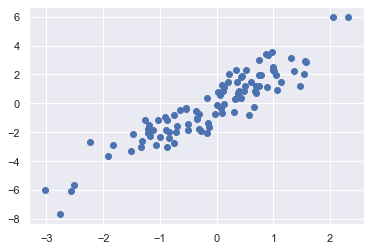

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Selecting some random points (without replacements)

In [51]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([43, 83, 96, 88, 51, 85, 99, 40, 82, 21, 55, 58, 97, 18, 59,  0, 41,
       11, 66, 68])

In [52]:
selection = X[indices]
selection.shape

(20, 2)

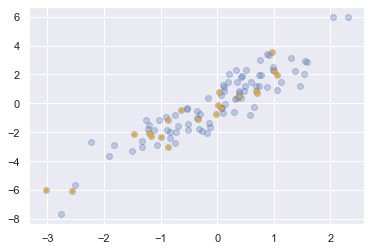

In [47]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='orange', s=10)
plt.show()

## Modifying Values 

In [55]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [56]:
x[i] -= 10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

Repeated indices can cause some unexpected results:

In [57]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Of course, we first assinged x[0] = 4 and then x[0] = 6, so the 4 disappears

In [58]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

You'd think x[3] would contain 2, and x[4] would contain 3. However, x[i] += 1 is shorthand for x[i] = x[i] + 1. Thus x[i] + 1 is calculated intially, and then the assignment happens multiple as opposed to the operation.

In [61]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


The at operator gives the expected effect

## Example: Binning Data

In [65]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

This counts the number of points within each bin - ie a histogram

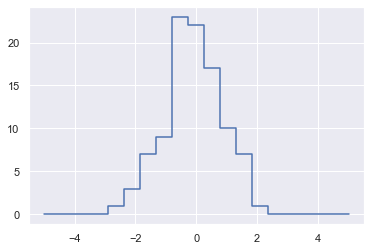

In [72]:
plt.plot(bins, counts, drawstyle='steps')
plt.show()

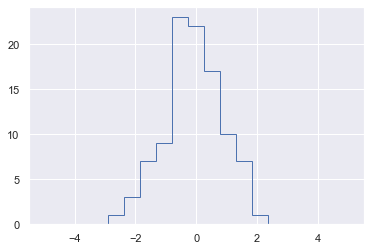

In [73]:
plt.hist(x, bins, histtype='step');

The problem with the above (albeit simpler method) is speed. Note plt.hist uses the np.hisogram method below

In [75]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
19.9 µs ± 362 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
13.3 µs ± 128 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


This is because np.histogram has more flexibility, and can perform better for large datasets:

In [76]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
57.1 ms ± 601 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
90.8 ms ± 130 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


This shows efficiency is not a simple question, and knowing when to apply the built in methods vs custom ones is a key skill